# Основные концепции Machine Learning. Домашняя работа

In [165]:
### Тут нужно сделать импорты всех необходимых библиотек ###
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# sns.set_style('darkgrid')
# theme = sns.axes_style()
# theme['figure.facecolor'] = '1E1E1E'
# theme['axes.facecolor'] = '0.13'
# theme['axes.labelcolor'] = '0.8'
# theme['text.color'] = '0.8'
# theme['xtick.color'] = '0.8'
# theme['ytick.color'] = '0.8'
# theme['grid.color'] = '0.3'
# sns.set_style('darkgrid', rc=theme)

In [166]:
### Здесь требуется загрузить датасет phones.csv ###
df = pd.read_csv('1.8_phones.csv')
df['os_id'] = df.apply(lambda x: 1 if x.os == 'Android' else 0, axis=1)
df.head()

,disk,os,price,year,os_id
0,64,Android,7256,2016,1
1,128,Android,7623,2015,1
2,64,Android,1916,2010,1
3,512,iOS,15045,2017,0
4,16,Android,4478,2013,1


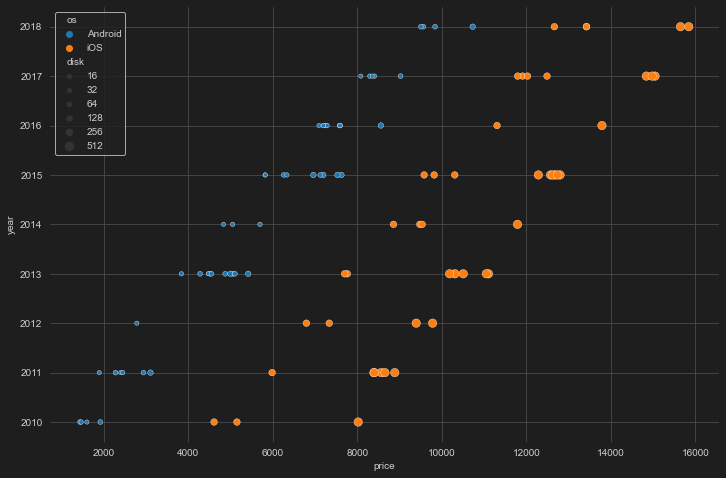

In [167]:
### Опционально: используя matplotlib, можно сделать визуализацию загруженного датасета ###
fig, ax = plt.subplots(figsize=(12, 8))

sns.scatterplot(data=df, x='price', y='year', hue='os', size='disk', ax=ax)
ax.grid(True)
plt.box(on=None)
plt.show()

Задание 1: обучить модель регрессии

In [168]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = df[['year', 'os_id', 'disk']]
y = df[['price']]

In [169]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score

reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)
 
print(explained_variance_score(y, y_pred))
print(y_pred[:5])
df[['price']].head()

0.9935909209846943
[[ 7664.43620643]
 [ 7316.34382022]
 [ 1588.92592837]
 [14728.54488444]
 [ 4128.3115723 ]]


,price
0,7256
1,7623
2,1916
3,15045
4,4478


Задание 2: обучить модель классификации

In [170]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

X = df[['disk', 'year', 'price']]
y = df['os_id']

|--- feature_0 <= 192.00
|   |--- class: 1
|--- feature_0 >  192.00
|   |--- class: 0



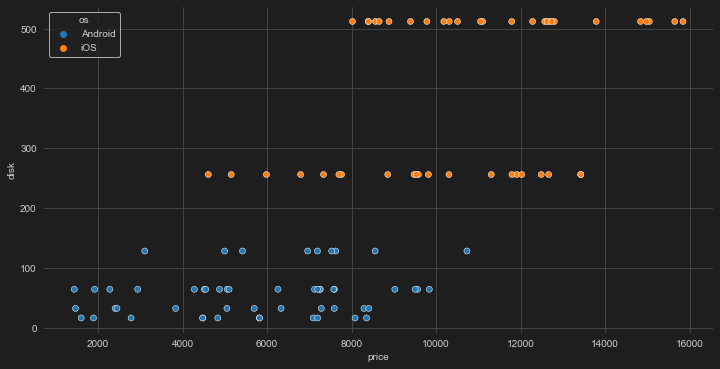

In [171]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###
tree = DecisionTreeClassifier().fit(X, y)
print(export_text(tree))

fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(data=df, x='price', y='disk', hue='os')
plt.box(on=None)

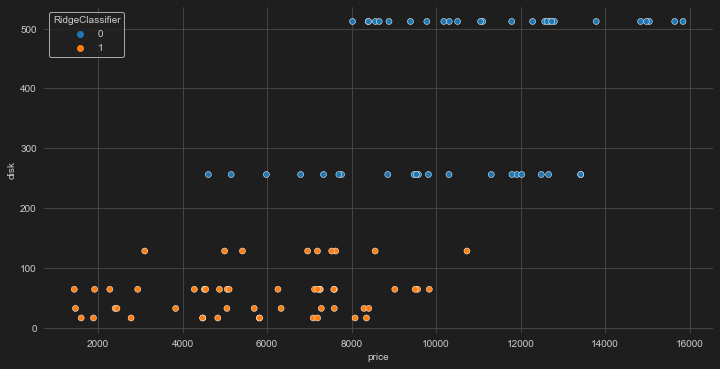

In [172]:
from sklearn.linear_model import RidgeClassifier

classifier = RidgeClassifier().fit(X, y)
classifier.score(X, y)
df['RidgeClassifier'] = classifier.predict(X)

fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(data=df, x='price', y='disk', hue='RidgeClassifier')
plt.box(on=None)

Задание 3: обучить модель кластеризации

In [173]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = df[['price', 'disk', 'year']]

0.5444168670187418


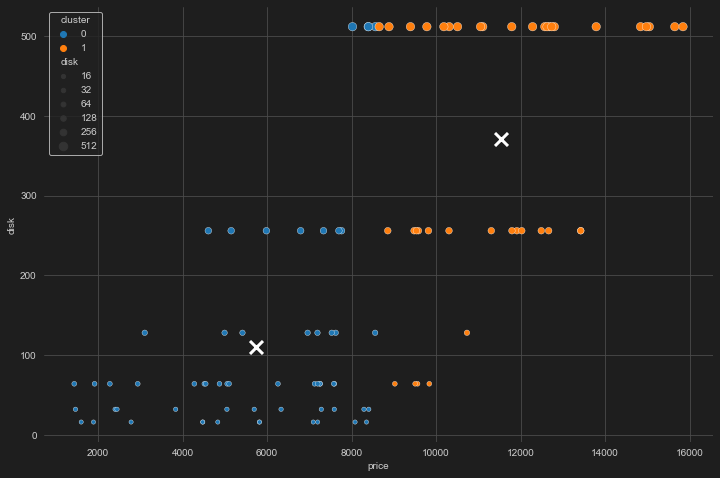

In [174]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###

clust = KMeans(2).fit(X)
preds = clust.fit_predict(X)
print(silhouette_score(X, preds))

df['cluster'] = clust.fit_predict(X)

# визуализация
fig, ax = plt.subplots(figsize=(12, 8))

sns.scatterplot(data=df, x='price', y='disk', size='disk', hue='cluster', ax=ax)

centroids = clust.cluster_centers_
ax.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w")

ax.grid(True)
plt.box(on=None)
plt.show()
